In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

output_dir = '/home/maria/AllenData'
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
session=cache.get_session_data(746083955)
lfp = session.get_lfp(760647907)

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning

In [19]:
natural_movie_one=session.get_stimulus_table(['natural_movie_one'])

'''
def get_time(row):
    start=row['start_time']
    end=row['stop_time']
    closest_time_start = np.abs(lfp.time - start).argmin()
    closest_time_end = np.abs(lfp.time - end).argmin()

    return closest_time_end-closest_time_start


# Apply the get_time function to each row of the natural_movie_one DataFrame
t = natural_movie_one.apply(get_time, axis=1)

# t now contains the duration in number of indices (samples) for each row in the stimulus table
print(t)'''
import numpy as np
start=np.array(natural_movie_one['start_time'])
end=np.array(natural_movie_one['stop_time'])
arr=[]
first=start[0]
last=end[-1]
lfp_marker_start=np.abs(lfp.time - first).argmin().item()
lfp_marker_end=np.abs(lfp.time - last).argmin().item()
print(lfp_marker_end)
segment=lfp.time[lfp_marker_start:lfp_marker_end]
for i in range(len(start)):
    closest_time_start = np.abs(segment - start[i]).argmin().item()
    closest_time_end = np.abs(segment - end[i]).argmin().item()
    t=closest_time_end-closest_time_start
    arr.append(t)



10022021


KeyboardInterrupt: 

In [20]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

# Convert the start and end times to numpy arrays
start = np.array(natural_movie_one['start_time'])
end = np.array(natural_movie_one['stop_time'])

arr = []
first = start[0]
last = end[-1]

# Find the closest lfp.time indices for the start and end of the movie
lfp_marker_start = np.abs(lfp.time - first).argmin().item()
lfp_marker_end = np.abs(lfp.time - last).argmin().item()
print(lfp_marker_end)

# Extract the relevant segment of lfp.time
segment = lfp.time[lfp_marker_start:lfp_marker_end]

# Function to compute the time difference for a given index
def compute_time_difference(i):
    closest_time_start = np.abs(segment - start[i]).argmin().item()
    closest_time_end = np.abs(segment - end[i]).argmin().item()
    return closest_time_end - closest_time_start

# Use ThreadPoolExecutor to parallelize the computation
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(compute_time_difference, i) for i in range(len(start))]
    for future in as_completed(futures):
        arr.append(future.result())

# arr now contains the time differences for all segments


10022021


In [18]:
segment

<xarray.DataArray 'time' (time: 42)>
array([2857.143934, 2857.144734, 2857.145534, 2857.146334, 2857.147134,
       2857.147934, 2857.148734, 2857.149534, 2857.150334, 2857.151134,
       2857.151934, 2857.152734, 2857.153534, 2857.154334, 2857.155134,
       2857.155934, 2857.156734, 2857.157534, 2857.158334, 2857.159134,
       2857.159934, 2857.160734, 2857.161534, 2857.162334, 2857.163134,
       2857.163934, 2857.164734, 2857.165534, 2857.166334, 2857.167134,
       2857.167934, 2857.168734, 2857.169534, 2857.170334, 2857.171134,
       2857.171934, 2857.172734, 2857.173534, 2857.174334, 2857.175134,
       2857.175934, 2857.176734])
Coordinates:
  * time     (time) float64 2.857e+03 2.857e+03 ... 2.857e+03 2.857e+03

(array([ 5376.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12624.]),
 array([41. , 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42. ]),
 <BarContainer object of 10 artists>)

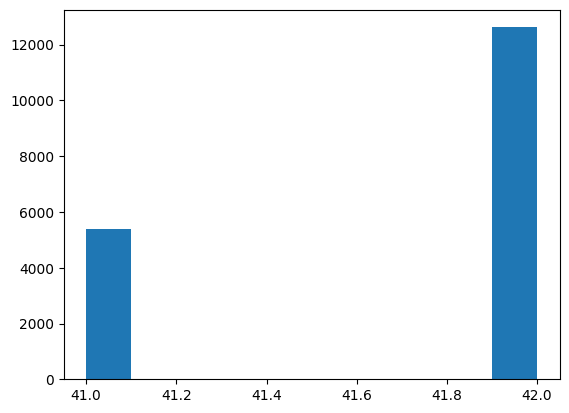

In [22]:
import matplotlib.pyplot as plt

plt.hist(arr)

In [ ]:
natural_movie_three=session.get_stimulus_table(['natural_movie_three'])
natural_images=session.get_stimulus_table(['natural_scenes'])